# Tutorial: optimal binning with continuous target

## Basic

To get us started, let's load a well-known dataset from the UCI repository and transform the data into a ``pandas.DataFrame``.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

We choose a variable to discretize and the continuous target.

In [3]:
variable = "LSTAT"
x = df[variable].values
y = data.target

Import and instantiate an ``ContinuousOptimalBinning`` object class. We pass the variable name and its data type.

In [4]:
from optbinning import ContinuousOptimalBinning

In [5]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical")

We fit the optimal binning object with arrays ``x`` and ``y``.

In [6]:
optb.fit(x, y)

ContinuousOptimalBinning(name='LSTAT')

You can check if an optimal solution has been found via the ``status`` attribute:

In [7]:
optb.status

'OPTIMAL'

You can also retrieve the optimal split points via the ``splits`` attribute:

In [8]:
optb.splits

array([ 4.6500001 ,  5.49499989,  6.86500001,  9.7249999 , 11.67499971,
       13.0999999 , 16.08500004, 19.89999962, 23.31500053])

#### The binning table

The optimal binning algorithms return a binning table; a binning table displays the binned data and several metrics for each bin. Class ``ContinuousOptimalBinning`` returns an object ``ContinuousBinningTable`` via the ``binning_table`` attribute.

In [9]:
binning_table = optb.binning_table

In [10]:
type(binning_table)

optbinning.binning.binning_statistics.ContinuousBinningTable

The `binning_table` is instantiated, but not built. Therefore, the first step is to call the method `build`, which returns a ``pandas.DataFrame``.

In [11]:
binning_table.build()

Bin  Count  Count (%)      Sum       Std       Mean   Min  \
0         (-inf, 4.65)     50   0.098814   1985.9  8.198651  39.718000  22.8   
1         [4.65, 5.49)     28   0.055336    853.2  6.123541  30.471429  21.9   
2         [5.49, 6.87)     45   0.088933   1188.6  5.136259  26.413333  20.6   
3         [6.87, 9.72)     89   0.175889   2274.9  6.845250  25.560674  11.9   
4        [9.72, 11.67)     49   0.096838   1057.9  2.994842  21.589796  15.0   
5       [11.67, 13.10)     35   0.069170    697.5  2.592139  19.928571  14.5   
6       [13.10, 16.09)     66   0.130435   1289.9  3.541705  19.543939  10.2   
7       [16.09, 19.90)     69   0.136364   1129.3  3.607949  16.366667   8.3   
8       [19.90, 23.32)     28   0.055336    368.4  3.912839  13.157143   5.0   
9         [23.32, inf)     47   0.092885    556.0  4.006586  11.829787   5.0   
10             Special      0   0.000000      0.0       NaN   0.000000   NaN   
11             Missing      0   0.000000      0.0       NaN   0.000000   NaN   
Totals                    506   1.000000  11401.6            22.532806   5.0   

         Max  Zeros count        WoE        IV  
0       50.0            0  17.185194  1.698142  
1       50.0            0   7.938622  0.439291  
2       48.8            0   3.880527  0.345106  
3       50.0            0   3.027868  0.532570  
4       31.0            0  -0.943010  0.091319  
5       27.9            0  -2.604235  0.180135  
6       30.7            0  -2.988867  0.389852  
7       27.5            0  -6.166140  0.840837  
8       21.7            0  -9.375663  0.518811  
9       23.7            0 -10.703019  0.994154  
10       NaN            0 -22.532806  0.000000  
11       NaN            0 -22.532806  0.000000  
Totals  50.0            0             6.030218

Let's describe the columns of this binning table:

- Bin: the intervals delimited by the optimal split points.
- Count: the number of records for each bin.
- Count (%): the percentage of records for each bin.
- Sum: the target sum for each bin.
- Std: the target std for each bin.
- Mean: the target mean for each bin.
- Min: the target min value for each bin.
- Max: the target max value for each bin.
- Zeros count: the number of zeros for each bin.
- WoE: Surrogate Weight-of-Evidence for each bin.
- IV: Surrogate IV for each bin.

The WoE IV for a continuous target is computed as follows:

\begin{equation}
IV = \sum_{i=1}^n \text{WoE}_i \frac{r_i}{r_T}, \quad \text{WoE}_i = |U_i - \mu|,
\end{equation}

where $U_i$ is the target mean value for each bin, $\mu$ is the total target mean, $r_i$ is the number of records for each bin, and $r_T$ is the total number of records.

The last row shows the total number of records, sum and mean.

You can use the method ``plot`` to visualize the histogram and mean curve. Note that the Bin ID corresponds to the binning table index.

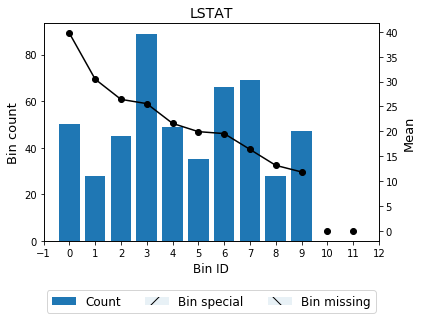

In [12]:
binning_table.plot()

Optionally, you can show the binning plot with the actual bin widths.

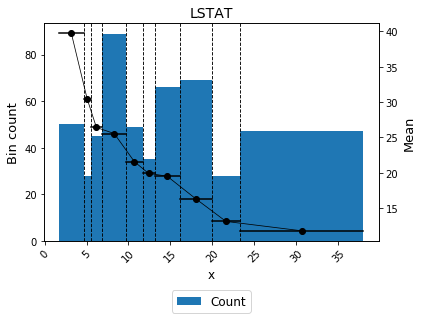

In [13]:
binning_table.plot(style="actual")

##### Mean transformation

Now that we have checked the binned data, we can transform our original data into mean values. You can check the correctness of the transformation using pandas ``value_counts`` method, for instance.

In [14]:
x_transform_mean = optb.transform(x, metric="bins")

In [15]:
pd.Series(x_transform_mean).value_counts()

[6.87, 9.72)      89
[16.09, 19.90)    69
[13.10, 16.09)    66
(-inf, 4.65)      50
[9.72, 11.67)     49
[23.32, inf)      47
[5.49, 6.87)      45
[11.67, 13.10)    35
[19.90, 23.32)    28
[4.65, 5.49)      28
dtype: int64

## Advanced

Many of the advanced options have been covered in the previous tutorials with a binary target. **Check it out!** In this section, we focus on the mean monotonicity trend and the mean difference between bins.

#### Binning table statistical analysis

The ``analysis`` method performs a statistical analysis of the binning table, computing the Information Value (IV) and Herfindahl-Hirschman Index (HHI). Additionally, several statistical significance tests between consecutive bins of the contingency table are performed using the Student's t-test.

In [16]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Continuous Binning Table Analysis
-------------------------------------------------

  General metrics

    IV                       6.03021763
    HHI                      0.11313253
    HHI (normalized)         0.03250821
    Quality score            0.21464367

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value
        0      1     5.644492 3.313748e-07
        1      2     2.924528 5.175586e-03
        2      3     0.808313 4.206096e-01
        3      4     4.714124 6.127108e-06
        4      5     2.712699 8.189719e-03
        5      6     0.622294 5.353397e-01
        6      7     5.162973 8.663417e-07
        7      8     3.742511 4.988278e-04
        8      9     1.408305 1.643801e-01



#### Mean monotonicity

The monotonic_trend option permits forcing a monotonic trend to the mean curve. The default setting “auto” should be the preferred option, however, some business constraints might require to impose different trends. The default setting “auto” chooses the monotonic trend most likely to minimize the L1-norm from the options “ascending”, “descending”, “peak” and “valley” using a machine-learning-based classifier.

In [17]:
variable = "INDUS"
x = df[variable].values
y = data.target

In [18]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical",
                                monotonic_trend="auto")
optb.fit(x, y)

ContinuousOptimalBinning(name='INDUS')

In [19]:
binning_table = optb.binning_table
binning_table.build()

Bin  Count  Count (%)      Sum       Std       Mean   Min  \
0         (-inf, 3.35)     63   0.124506   1994.0  8.569841  31.650794  16.5   
1         [3.35, 5.04)     57   0.112648   1615.2  8.072710  28.336842  17.2   
2         [5.04, 6.66)     66   0.130435   1723.7  7.879078  26.116667  16.0   
3         [6.66, 8.01)     31   0.061265    692.0  4.604886  22.322581  14.4   
4        [8.01, 16.57)    100   0.197628   2045.5  3.547348  20.455000  11.9   
5       [16.57, 18.84)    132   0.260870   2165.3  8.507336  16.403788   5.0   
6         [18.84, inf)     57   0.112648   1165.9  9.519086  20.454386   7.0   
7              Special      0   0.000000      0.0       NaN   0.000000   NaN   
8              Missing      0   0.000000      0.0       NaN   0.000000   NaN   
Totals                    506   1.000000  11401.6            22.532806   5.0   

         Max  Zeros count        WoE        IV  
0       50.0            0   9.117987  1.135243  
1       50.0            0   5.804036  0.653814  
2       50.0            0   3.583860  0.467460  
3       35.2            0  -0.210226  0.012879  
4       28.7            0  -2.077806  0.410634  
5       50.0            0  -6.129018  1.598874  
6       50.0            0  -2.078420  0.234130  
7        NaN            0 -22.532806  0.000000  
8        NaN            0 -22.532806  0.000000  
Totals  50.0            0             4.513036

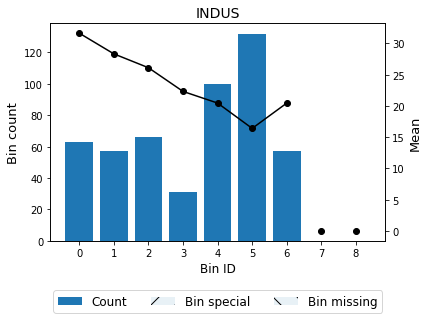

In [20]:
binning_table.plot()

In [21]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Continuous Binning Table Analysis
-------------------------------------------------

  General metrics

    IV                       4.51303567
    HHI                      0.16875752
    HHI (normalized)         0.06485221
    Quality score            0.74831364

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic  p-value
        0      1     2.180865 0.031181
        1      2     1.537968 0.126745
        2      3     2.976660 0.003739
        3      4     2.075258 0.044180
        4      5     4.934158 0.000002
        5      6    -2.770230 0.006721



A smoother curve, keeping the valley monotonicity, can be achieved by using ``monotonic_trend="convex"``.

In [22]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical",
                                monotonic_trend="convex")
optb.fit(x, y)

ContinuousOptimalBinning(monotonic_trend='convex', name='INDUS')

In [23]:
binning_table = optb.binning_table
binning_table.build()

Bin  Count  Count (%)      Sum       Std       Mean   Min  \
0        (-inf, 3.99)     92   0.181818   2932.6  8.688703  31.876087  16.5   
1        [3.99, 5.04)     28   0.055336    676.6  4.000198  24.164286  17.2   
2        [5.04, 6.08)     40   0.079051    878.6  4.405028  21.965000  16.0   
3       [6.08, 18.84)    289   0.571146   5747.9  8.107544  19.888927   5.0   
4        [18.84, inf)     57   0.112648   1165.9  9.519086  20.454386   7.0   
5             Special      0   0.000000      0.0       NaN   0.000000   NaN   
6             Missing      0   0.000000      0.0       NaN   0.000000   NaN   
Totals                   506   1.000000  11401.6            22.532806   5.0   

         Max  Zeros count        WoE        IV  
0       50.0            0   9.343281  1.698778  
1       37.3            0   1.631479  0.090279  
2       42.8            0  -0.567806  0.044886  
3       50.0            0  -2.643879  1.510042  
4       50.0            0  -2.078420  0.234130  
5        NaN            0 -22.532806  0.000000  
6        NaN            0 -22.532806  0.000000  
Totals  50.0            0             3.578116

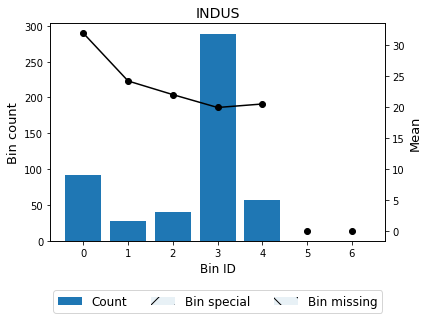

In [24]:
binning_table.plot()

In [25]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Continuous Binning Table Analysis
-------------------------------------------------

  General metrics

    IV                       3.57811558
    HHI                      0.38126670
    HHI (normalized)         0.27814448
    Quality score            0.22169448

  Monotonic trend       valley (convex)

  Significance tests

    Bin A  Bin B  t-statistic      p-value
        0      1     6.536206 2.732420e-09
        1      2     2.139577 3.636038e-02
        2      3     2.459425 1.602640e-02
        3      4    -0.419474 6.761033e-01



For example, we can force the variable INDUS (proportion of non-retail business acres per town) to be monotonically descending with respect to the house-price.

In [26]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical",
                                monotonic_trend="descending")
optb.fit(x, y)

ContinuousOptimalBinning(monotonic_trend='descending', name='INDUS')

In [27]:
binning_table = optb.binning_table
binning_table.build()

Bin  Count  Count (%)      Sum       Std       Mean   Min  \
0         (-inf, 3.35)     63   0.124506   1994.0  8.569841  31.650794  16.5   
1         [3.35, 5.04)     57   0.112648   1615.2  8.072710  28.336842  17.2   
2         [5.04, 6.66)     66   0.130435   1723.7  7.879078  26.116667  16.0   
3         [6.66, 8.01)     31   0.061265    692.0  4.604886  22.322581  14.4   
4        [8.01, 16.57)    100   0.197628   2045.5  3.547348  20.455000  11.9   
5       [16.57, 20.73)    162   0.320158   2874.8  9.618450  17.745679   5.0   
6         [20.73, inf)     27   0.053360    456.4  3.690878  16.903704   7.0   
7              Special      0   0.000000      0.0       NaN   0.000000   NaN   
8              Missing      0   0.000000      0.0       NaN   0.000000   NaN   
Totals                    506   1.000000  11401.6            22.532806   5.0   

         Max  Zeros count        WoE        IV  
0       50.0            0   9.117987  1.135243  
1       50.0            0   5.804036  0.653814  
2       50.0            0   3.583860  0.467460  
3       35.2            0  -0.210226  0.012879  
4       28.7            0  -2.077806  0.410634  
5       50.0            0  -4.787127  1.532638  
6       23.0            0  -5.629103  0.300367  
7        NaN            0 -22.532806  0.000000  
8        NaN            0 -22.532806  0.000000  
Totals  50.0            0             4.513036

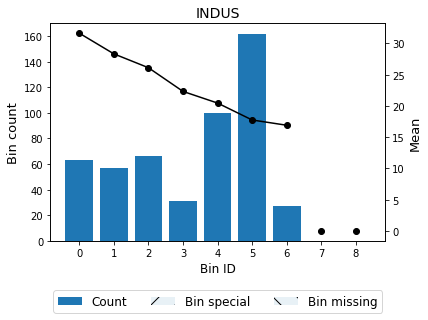

In [28]:
binning_table.plot()

In [29]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Continuous Binning Table Analysis
-------------------------------------------------

  General metrics

    IV                       4.51303567
    HHI                      0.19336343
    HHI (normalized)         0.09253386
    Quality score            0.42428843

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value
        0      1     2.180865 0.031181
        1      2     1.537968 0.126745
        2      3     2.976660 0.003739
        3      4     2.075258 0.044180
        4      5     3.245419 0.001354
        5      6     0.811840 0.418853



#### Mininum mean difference between consecutive bins

Now, we note that the mean difference between consecutive bins is not significant enough. Therefore, we decide to set ``min_mean_diff=2.0``:

In [30]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical",
                                monotonic_trend="descending", min_mean_diff=2.0)
optb.fit(x, y)

ContinuousOptimalBinning(min_mean_diff=2.0, monotonic_trend='descending',
                         name='INDUS')

In [31]:
binning_table = optb.binning_table
binning_table.build()

Bin  Count  Count (%)      Sum       Std       Mean   Min  \
0        (-inf, 3.35)     63   0.124506   1994.0  8.569841  31.650794  16.5   
1        [3.35, 5.04)     57   0.112648   1615.2  8.072710  28.336842  17.2   
2        [5.04, 6.66)     66   0.130435   1723.7  7.879078  26.116667  16.0   
3       [6.66, 16.57)    131   0.258893   2737.5  3.905622  20.896947  11.9   
4        [16.57, inf)    189   0.373518   3331.2  9.018376  17.625397   5.0   
5             Special      0   0.000000      0.0       NaN   0.000000   NaN   
6             Missing      0   0.000000      0.0       NaN   0.000000   NaN   
Totals                   506   1.000000  11401.6            22.532806   5.0   

         Max  Zeros count        WoE        IV  
0       50.0            0   9.117987  1.135243  
1       50.0            0   5.804036  0.653814  
2       50.0            0   3.583860  0.467460  
3       35.2            0  -1.635860  0.423513  
4       50.0            0  -4.907409  1.833005  
5        NaN            0 -22.532806  0.000000  
6        NaN            0 -22.532806  0.000000  
Totals  50.0            0             4.513036

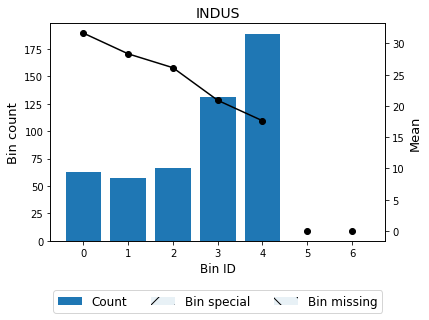

In [32]:
binning_table.plot()

In [33]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Continuous Binning Table Analysis
-------------------------------------------------

  General metrics

    IV                       4.51303567
    HHI                      0.25174585
    HHI (normalized)         0.12703682
    Quality score            0.73853806

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value
        0      1     2.180865 0.031181
        1      2     1.537968 0.126745
        2      3     5.076919 0.000002
        3      4     4.424387 0.000014

